In [87]:
import numpy as np
from matplotlib import pyplot as plt

TISE
$$
-\frac{1}{2}\frac{d^2 \psi}{dx'^2} + V'(x)\psi(x) = E'\psi(x)
$$
TDSE
$$
i\frac{\partial \psi}{\partial t'} = -\frac{1}{2}\frac{\partial^2 \psi}{\partial x'^2 } + V'(x)\psi
$$

In [194]:
def check_tise(psi,V,E):
    dydx = np.gradient(psi,2)
    return np.array([((-1/2) * dydx  +  V*psi )- E*psi < 0.01])


def check_tdse(psi,V):
    dydx = np.gradient(psi,2,axis=0)
    dydt = np.gradient(psi,1, axis = 1)
    return np.array([-(1j * dydt) -1/2 * dydx + V*psi < 0.0001])

# foo = np.array([1.,4.,9.,16.])
# Delt = np.array([])
# for i in range(len(foo)):
#     Delt = np.append(Delt, [np.array([np.exp(i+1) + foo[i-1]])])
# test_2d = np.copy(foo)

# test_2d = np.vstack((test_2d,Delt))
# print(f'2d = {test_2d},foo = {foo},Del = {Delt}')
# for x in range(1,5):
    # print(np.exp(x))


# check_tdse(test_2d)
# check_tise(foo,0,0)

### TISE: Time Independent Schrodinger Equation 1D
$$
-\frac{\hbar ^ 2 }{2m}\frac{d^2 \psi}{dx^2} + V(x)\psi(x) = E\psi(x)
$$
Dimensionless
$$
-\frac{1}{2}\frac{d^2 \psi}{dx'^2} + V'(x)\psi(x) = E'\psi(x)
$$

#### Finite difference:
$$
f'' = \frac{f(x+\Delta x)-2f(x)+f(x-\Delta x)}{\Delta x^2}
$$
Apply finite difference in TISE, Assume $\hbar = 1$:
$$
\psi_{n-1} = -\psi(x_{n-2}) + [2 + 2m\Delta x^2V(x_{n-1})]\psi(x_{n-1}) - \psi(x_n) -2m\Delta x^2 \psi(x_{n-1})
$$
Changing into eigenvalue problem in Matrix form (dimensionless);
$$
M = \begin{bmatrix}
2 & -1 & 0 & 0 & 0\\
-1 & 2 & -1 & 0 & 0\\
0 & -1 & 2 & -1 & 0\\
0 & 0 & -1 & 2 & -1\\
0 & 0 & 0 & -1 & 2\\
\end{bmatrix}
\begin{bmatrix}
\psi(x_1) &\\
\psi(x_2) &\\
\psi(x_3) &\\
\psi(x_4) &\\
\psi(x_5) &\\
\end{bmatrix}
= 2E\begin{bmatrix}
\psi(x_1) &\\
\psi(x_2) &\\
\psi(x_3) &\\
\psi(x_4) &\\
\psi(x_5) &\\
\end{bmatrix}
$$

[0.00094855 0.00094855 0.00379325 0.00379325 0.00853117]
[True, True, True, True, True]


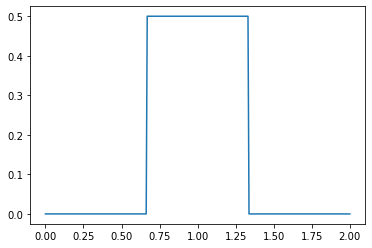

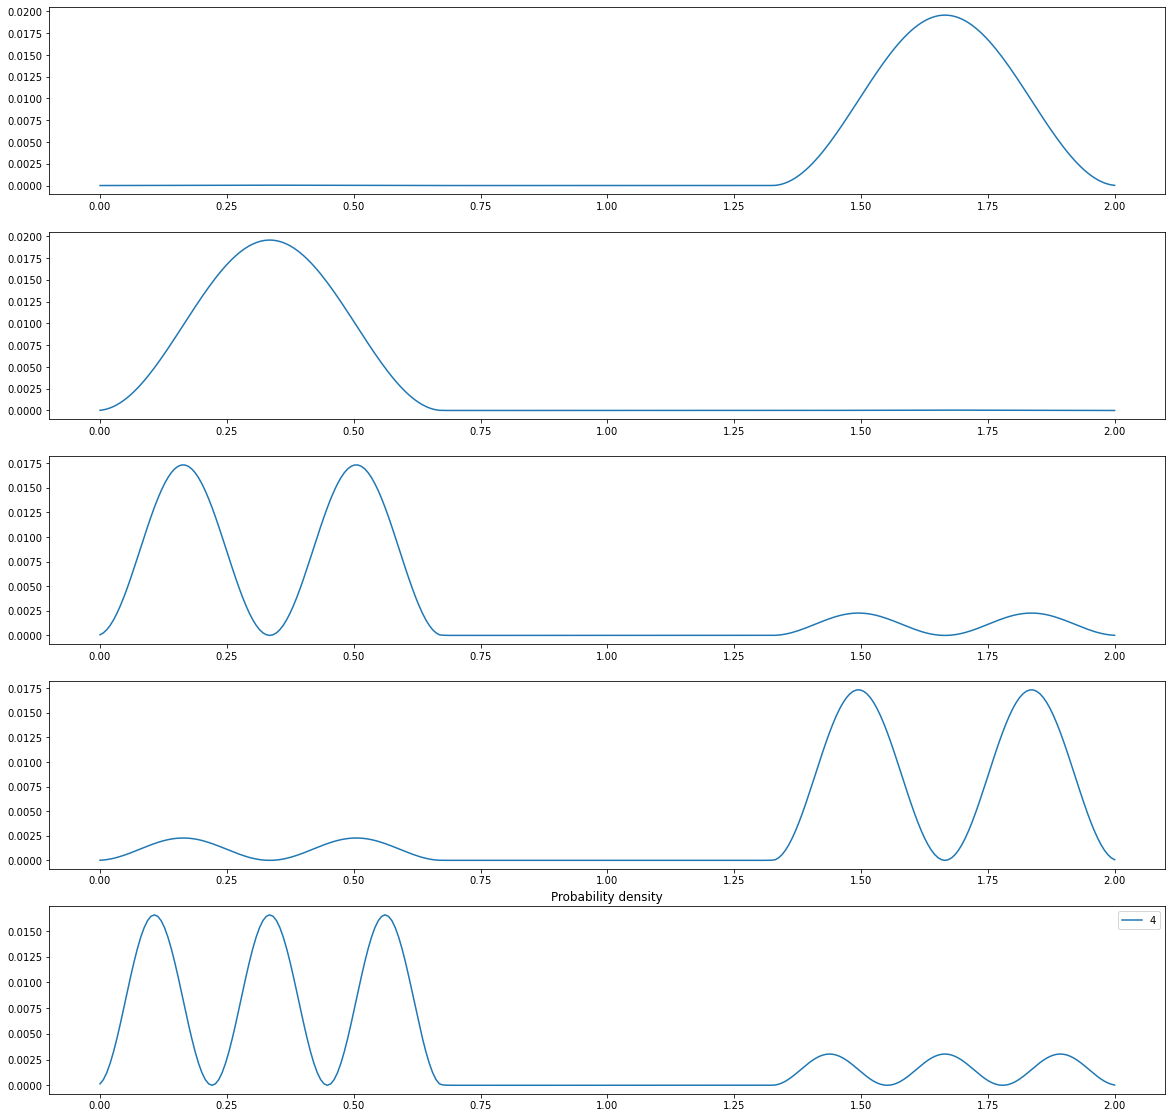

In [143]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import sparse
from scipy.sparse.linalg import eigsh
from scipy.sparse.linalg import eigs

# 1D TISE

# system parameters
L = 2
N = 300
dx = L/(N)

mu,sig = 1.0 , 1/4

# x axis
x = np.linspace(0,2,N)


# potential 
def potential(x,mu,sig):
    return 100*-np.exp(-((x-mu)**2 )/ (2*sig**2))
# def potential(x,mu,sig):
    # return 10 * (x - 1)**2

# def potential(x, mu, sig):
    # return x * 0

def potential(x,mu,sig):
    a = np.ones(N) * 0.5
    a[:100] = 0
    a[200:] = 0
    return a

# matrix 
dia = np.ones([N])
diaa = np.array([dia * -1 , 2 * dia, dia * -1])
dia_potential = sparse.diags(potential(x,mu,sig))
M = sparse.spdiags(diaa, np.array([-1,0,1]),N,N) + dia_potential
# print(M.toarray())
e_values , e_vectors = eigsh(M, which = 'SA', k = 5)
print(e_values)
plt.plot(x,potential(x,mu,sig))

# plt.plot(x,e_vectors.T[0]**2, label = "0")
# plt.plot(x,e_vectors.T[0])

# plt.plot(x,e_vectors.T[1]**2, label = "1")
# plt.plot(x,e_vectors.T[1])

# plt.plot(x,e_vectors.T[2]**2, label = "2")
# plt.plot(x,e_vectors.T[2])
a = []
for i in range(5):
    a = [check_tise(e_vectors.T[i],potential(x,mu,sig),e_values[i]).all()] + a

print(a)

fig, ax = plt.subplots(5,figsize = (20,20))
for n in range(5):
    ax[n].plot(x,e_vectors.T[n]**2,label = n)
    # plt.plot(x,e_vectors.T[n]**2, label = n)
plt.title(label = "Probability density")
plt.legend()
plt.show()

### TDSE: Time Dependent Schrodinger Equation 1D
$$
i\hbar \frac{d \psi (x,t)}{dt} = \frac{-\hbar^2}{2m} \frac{\partial^2 \psi (x,t)}{\partial x} + V(x,t) \psi (x,t)
\\
i\frac{\partial \psi}{\partial t'} = -\frac{1}{2}\frac{\partial^2 \psi}{\partial x'^2 } + V'(x)\psi
$$
#### Finite diferenece
$$
i\frac{\psi^{m+1}_{j} + \psi^{m}_{j}}{\Delta t} = -\frac{1}{2} \frac{\psi^{m}_{j+1} -2\psi^{m}_{j} + \psi^{m}_{j-1}}{\Delta x ^2} + V(x)\psi^{m}_{j} 
$$
$\psi$ of next time step at the position $j$
$$
\psi^{m+1}_{j} = \psi^{m}_{j} + \frac{i\Delta t}{2\Delta x^2}[\psi^{m}_{j+1} -2\psi^{m}_{j} + \psi^{m}_{j-1}] -i\Delta t V(x) \psi^{m}_{j} 
$$

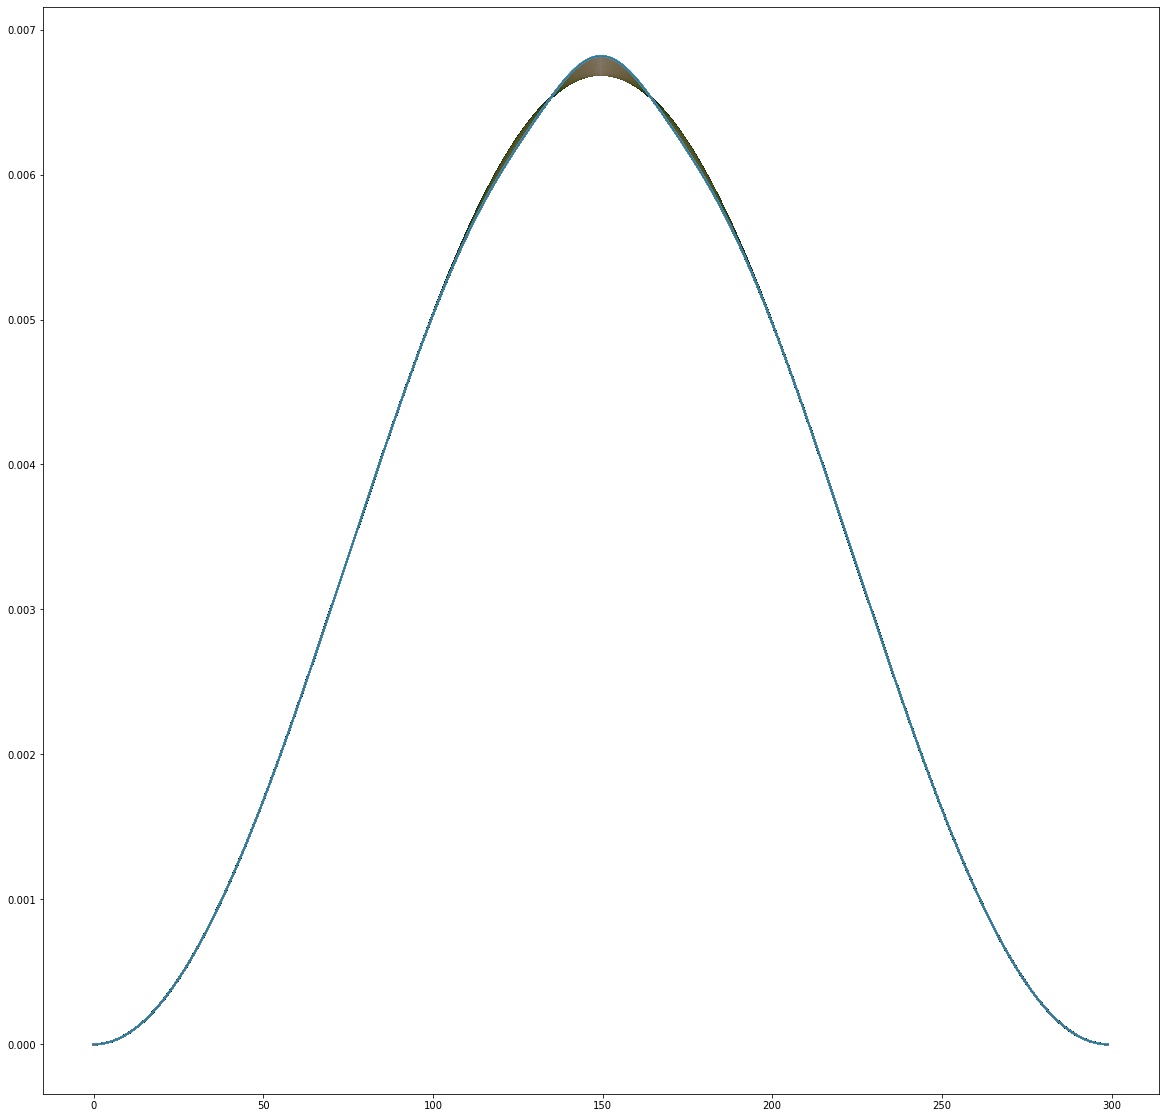

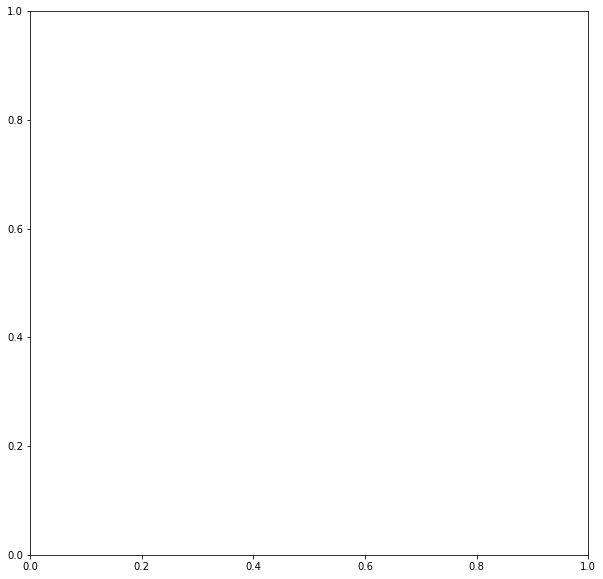

In [198]:
# system parameter
L = 1
N = 300
dx = L/(N-1)
Nt = 10000
dt = 1e-7
T = Nt * dt 
mu , sig = L/2 , L/20
# print(Nt)

# system grid
x = np.linspace(0,L ,N)

# init wave psi0
psi0 = np.sin(np.pi * x)
# plt.plot(x,psi0)
# print(psi0)

# normalized wave function
norm = np.sum(np.abs(psi0)**2)
psi0 = np.sqrt(1/norm) * psi0
# print(np.sum(np.abs(psi0)**2))

# potential
# def V(x,mu,sig):
    # return 0
def V(x,mu,sig):
    return -1e2*np.exp(-(x-mu)**2 / (2*sig**2))
# def V(x,mu,sig):
    # tophat = np.zeros([N])
    # tophat[100:] = 1e8
    # tophat[200:] = 0
    # return tophat
# plt.plot(x,V(x,mu,sig))

# time evolution of wave function psi
def get_psi(psi):
    psi_next = np.copy(psi)
    for i in range (1,N-1):
        psi_next[i] = psi[i] + 1j/2 * dt/dx**2 * (psi[i+1] - 2*psi[i] + psi[i-1]) - 1j*dt*V(x[i],mu,sig)*psi[i]
    # print(np.sum(np.abs(psi_next)**2))
    norm = np.sum(np.abs(psi_next)**2)
    psi_next = np.sqrt(1/norm) * psi_next
    # print(np.sum(np.abs(psi_next)**2),'n')
    return psi_next

# n = 5
# fig,axs = plt.subplots(n , figsize = (15,15))

# psi_a = np.copy(psi0)

# for n in range(n):
    
#     psi_b = get_psi(psi_a.astype(complex))
#     psi_a = psi_b
#     axs[n].plot(x,psi_b)
# print(psi_b)

# print(psi0,get_psi(psi0.astype(complex)))

fig = plt.subplots(figsize = (20,20))
E = np.copy(psi0)
psi_prev = np.copy(psi0)
k = 0
t = 0 
while t < T:
    psi_next = get_psi(psi_prev.astype(complex))
    E = np.vstack((E,psi_next))
    psi_prev = psi_next
    t = t + dt
    plt.plot(np.abs(E[k])**2)
    k += 1




# run_tdse(psi0)
fig = plt.subplots(figsize = (10,10))
# plt.plot(x,V(x,mu,sig))
# for i in range (15):
    # plt.plot(x,np.abs(E[i])**2)


array([[[ True, False, False, ..., False, False,  True],
        [ True, False, False, ..., False, False,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]]])

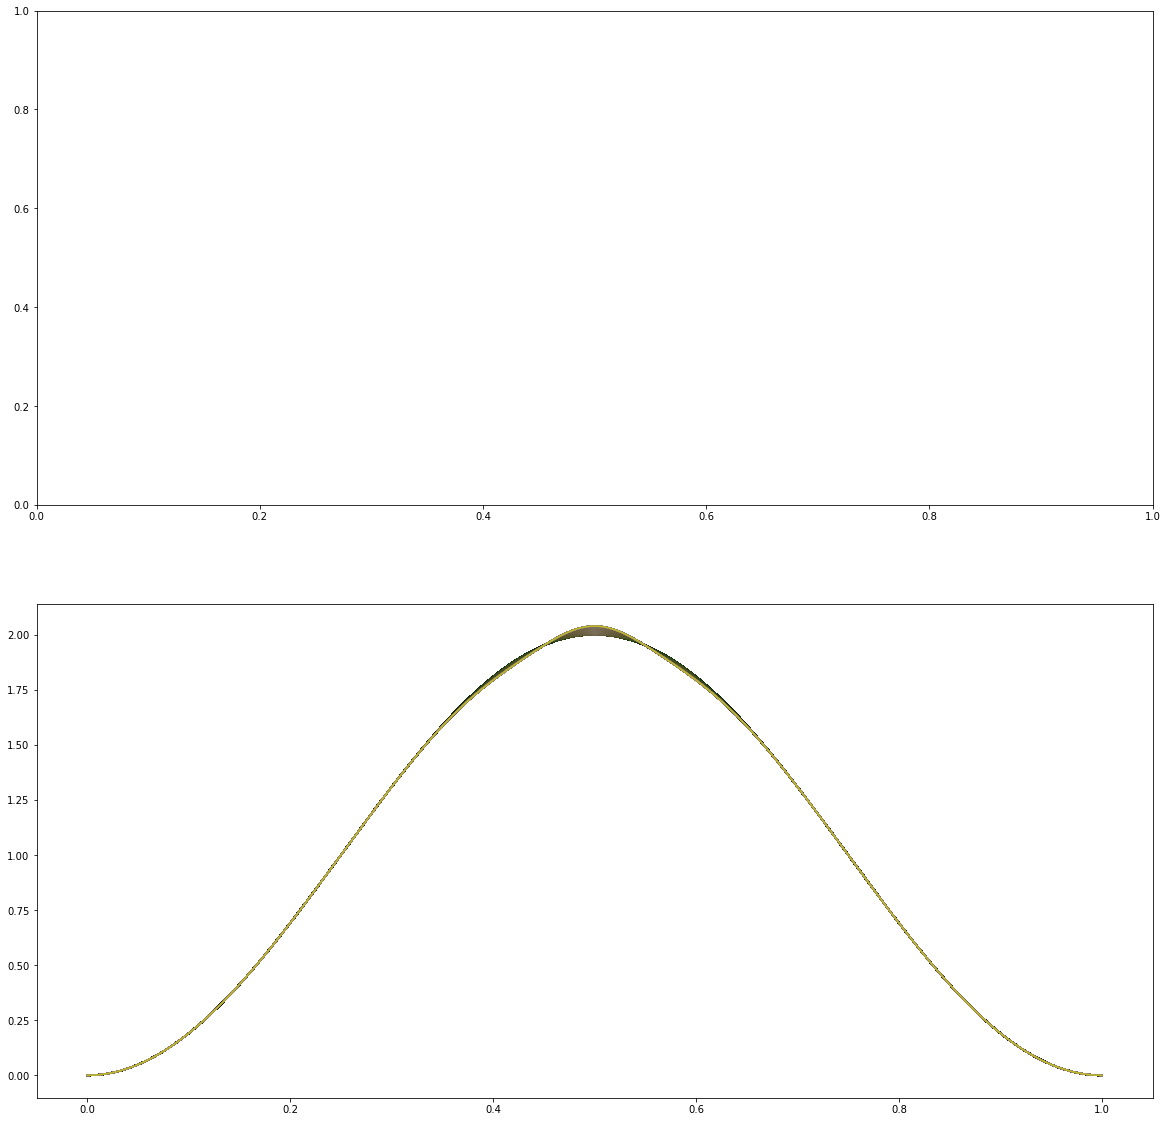

In [199]:
import numba
from numba import jit
Nx = 301
Nt = 10000
dx = 1/(Nx-1)
dt= 1e-7
x = np.linspace(0, 1, Nx)
psi0 = np.sqrt(2)*np.sin(np.pi*x)
mu, sigma = 1/2, 1/20
V = -1e2*np.exp(-(x-mu)**2/(2*sigma**2))

psi = np.zeros([Nt,Nx])
psi[0] = psi0



fig ,axs = plt.subplots(2, figsize = (20,20))
def compute_psi(psi):
    for t in range(0, Nt-1):
        for i in range(1, Nx-1):
            psi[t+1][i] = psi[t][i] + 1j/2 * dt/dx**2 * (psi[t][i+1] - 2*psi[t][i] + psi[t][i-1]) - 1j*dt*V[i]*psi[t][i]
        
        normal = np.sum(np.absolute(psi[t+1])**2)*dx
        for i in range(1, Nx-1):
            psi[t+1][i] = psi[t+1][i]/normal    
        plt.plot(x,np.abs(psi[t+1][:])**2)
    return psi

psi_m1 = compute_psi(psi.astype(complex))
# axs[0].plot(x,np.abs(psi_m1[200])**2 )
# axs[0].plot(x,psi0)


arr_V = [V[i] for i in range(Nx)]
# print(arr_V)
check_tdse(psi,arr_V)